In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Aakansha\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data=pd.read_csv("3.12. Example.csv")
data.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


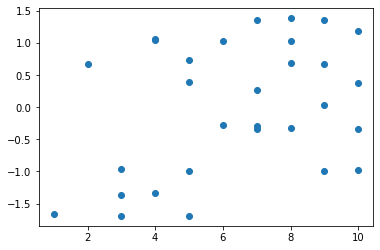

In [3]:
plt.scatter(data['Satisfaction'],data['Loyalty'])

In [4]:
from sklearn.cluster import KMeans

In [5]:
kmeans=KMeans(2)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
cluster_pred = kmeans.fit_predict(data)

Text(0, 0.5, 'Loyalty')

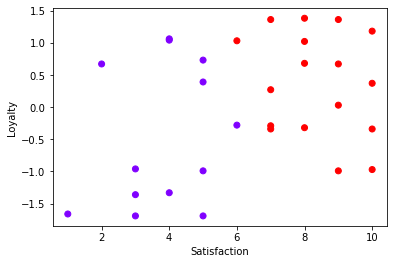

In [15]:
plt.scatter(data['Satisfaction'],data['Loyalty'],c=cluster_pred,cmap='rainbow')
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")

### standardizing the variable


In [16]:
from sklearn import preprocessing

In [19]:
x_scale=preprocessing.scale(data)
x_scale

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

### the Elbow method

In [20]:
wcss=[]

for i in range(1,30):
    kmeans= KMeans(i)
    kmeans.fit(x_scale)
    wcss.append(kmeans.inertia_)
wcss

[60.0,
 29.818973034723147,
 17.913349527387965,
 10.247181805928422,
 7.792695153937187,
 6.586212092192188,
 5.366082587179452,
 4.358871893303258,
 3.9780989407459244,
 3.292886890946914,
 2.866233284399987,
 2.4549077290235557,
 2.1518238738824786,
 1.8826498487677232,
 1.5485271436000498,
 1.2977249211112023,
 1.1729980830486568,
 1.0169986146437537,
 0.8727535026341838,
 0.6694325486451806,
 0.5362608768873279,
 0.423130275139057,
 0.3227119817275011,
 0.24721053307798668,
 0.17170908442847233,
 0.11383861748989679,
 0.0559681505513213,
 0.0014517677692203244,
 0.00020024383023728806]

Text(0, 0.5, 'wcss')

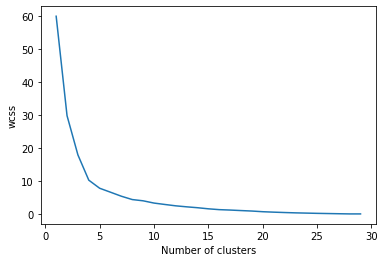

In [24]:
plt.plot(range(1,30),wcss)
plt.xlabel("Number of clusters")
plt.ylabel('wcss')


In [26]:
kmeans_new=KMeans(4)
kmeans.fit(x_scale)
cluster_pred_new=kmeans_new.fit_predict(x_scale)
cluster_pred_new

array([1, 0, 1, 0, 2, 1, 0, 0, 3, 3, 0, 2, 1, 2, 0, 3, 3, 3, 0, 3, 3, 1,
       2, 1, 2, 0, 3, 0, 1, 2])

### strong cluster

Text(0, 0.5, 'Loyalty')

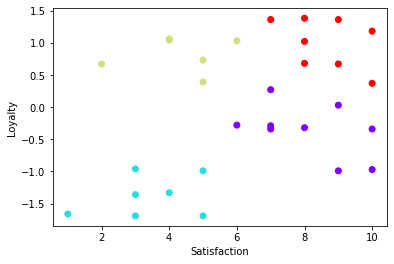

In [28]:
plt.scatter(data['Satisfaction'],data['Loyalty'],c=cluster_pred_new,cmap='rainbow')
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")